RED NEURONAL CONVOLUCIONAL:

Para este ejercicio vamos a clasificar imagenes de prendas de ropa 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

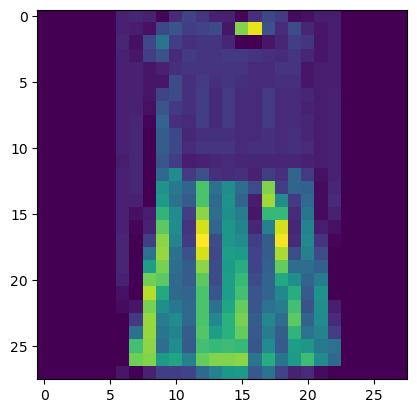

In [4]:
plt.imshow(train_images[251])

<h1>Limpieza de los datos</h1>

Reescalamos los valores

In [5]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

Un reshape a escala de grises

In [6]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

Categorizar los labels para que queden en un arreglo de 0 y 1, donde la posicion con 1 indica el tipo de prenda.

In [7]:
train_labels=tf.keras.utils.to_categorical(train_labels,10)
test_labels=tf.keras.utils.to_categorical(test_labels,10)

<H1>MODELO DE DATOS</H1>

In [8]:
model=tf.keras.Sequential()
#must define the input shape in the first layer of the neuronal network
model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## compilar - entrenar

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, batch_size=64, callbacks=[early], epochs=10)

NameError: name 'early' is not defined

In [ ]:
score=model.evaluate(test_images, test_labels, verbose=0)
score

<h1>Early Stoping</h1>

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
model.fit(train_images, train_labels, batch_size=64, callbacks=[early], epochs=10)

<h1> Checkpoint </h1>

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='my_first_cnn.hdf5',
                                  verbose=1,
                                  monitor='accuracy',
                                  )
model.fit(train_images, train_labels, batch_size=64, callbacks=[checkpoint], epochs=10)


In [ ]:
model2=model
model2.load_weights('./my_first_cnn.hdf5')

In [ ]:
model2.evaluate(test_images, test_labels)